# Initial Setup

## Installing PyPhi

This script was designed to be used with the [IIT-4.0 branch of PyPhi, commit dc6fe5d](https://github.com/isacdaavid/pyphi/tree/dc6fe5dcb6a97a941699499c73e92563cf44206d). PyPhi is the reference library to compute the quantities and structures of Integrated Information Theory.

**Run this** subsection of cells to install PyPhi and requisite libraries.

In [ ]:
!python -m pip install git+https://github.com/isacdaavid/pyphi.git@feature/iit-4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/isacdaavid/pyphi.git (to revision feature/iit-4.0) to /tmp/pip-req-build-xm3jqx8_
  Running command git clone -q https://github.com/isacdaavid/pyphi.git /tmp/pip-req-build-xm3jqx8_
  Running command git checkout -b feature/iit-4.0 --track origin/feature/iit-4.0
  Switched to a new branch 'feature/iit-4.0'
  Branch 'feature/iit-4.0' set up to track remote branch 'feature/iit-4.0' from 'origin'.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3 MB 14.0 MB/s 
     |████████████████████████████████| 3.3 MB 60.8 MB/s 
     |████████████████████████████████| 57.4 MB 97 kB/s 
     |████████████████████████████████| 1.2 MB 59.7 MB/s 
     |████████████████████████████████| 236 kB 52.6 MB/s 
     |████████████████████████████████| 8.8 MB 56.8 MB/s 
 

In [18]:
import pyphi
import math
import numpy as np

pyphi.config.PROGRESS_BARS = False
pyphi.config.PARALLEL_COMPLEX_EVALUATION = False
pyphi.config.PARALLEL_CONCEPT_EVALUATION = False
pyphi.config.PARALLEL_CONCEPT_EVALUATION = False
pyphi.config.PARALLEL_CUT_EVALUATION = False
pyphi.config.PARALLEL_PURVIEW_EVALUATION = math.inf
pyphi.config.PARALLEL_MECHANISM_PARTITION_EVALUATION = False

## Loading system data

This tutorial will be based on the second system from Figure 7-C:
_"Functionally equivalent networks with different Φ-structures"_.

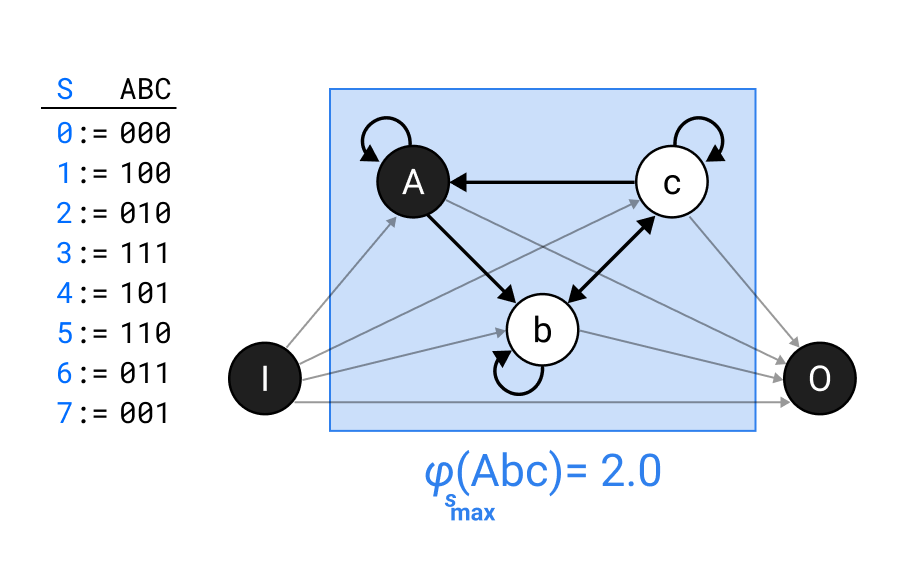

Background conditions (nodes "I" and "O") have already been fixed to
"I"=ON, "O"=ON in the hypothetical 5-node Transition Probability Matrix (TPM).
Therefore, we will start from a TPM which only contains nodes "A", "B", "C".

In [19]:
import pyphi
import numpy as np

node_labels = ("A", "B", "C")

# TPM in state-by-node format (see `help(pyphi.Network)` for information on TPM
# representations).
tpm = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 0],
    [1, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
])

# The network's adjacency matrix. In its absence, PyPhi will assume all-to-all
# connectivity.
connectivity_matrix = np.array([
    [1, 1, 0,],                 # A->A, A->B
    [0, 1, 1,],                 # B->B, B->C
    [1, 1, 1,],                 # C->A, C->B, C->C
])

We begin by instantiating a `Network` object. This holds the physical
substrate, which serves as the operational starting point to assess the causal
powers and intrinsic properties of a system.

In [20]:
network = pyphi.Network(tpm, cm=connectivity_matrix, node_labels=node_labels)
network

Network(ExplicitTPM([[[[1. 0. 0.]
   [0. 0. 0.]]

  [[1. 1. 1.]
   [0. 0. 1.]]]


 [[[0. 1. 0.]
   [1. 1. 0.]]

  [[0. 1. 1.]
   [1. 0. 1.]]]]), cm=[[1 1 0]
 [0 1 1]
 [1 1 1]])

Then we instantiate a `Subsystem` object. All further analysis of the resulting
`candidate_system` will be performed for a `state` of interest.
Here we use the full network ("A", "B", "C").
In general, system nodes that are excluded from the keyword argument `nodes` act
as fixed background units to the analysis, which means that the TPM is
conditioned on their respective state as specified by `state`.

In [21]:
# A=ON, B=OFF, C=OFF (Abc in Figure 7).
state = (1, 0, 0)

candidate_system = pyphi.Subsystem(network, state, nodes=node_labels)
candidate_system

Subsystem(A, B, C)

# System Irreducibility Analysis: identifying complexes

From the System Irreducibility Analysis (SIA), we can see that the
`candidate_system` in state `(1, 0, 0)` exists (it has a both cause and effect power, since II_c > 0 and II_e > 0) in a way that is intrinsic (within the system
ABC), informative (the cause and effect are specific states of system ABC), and
integrated ($φ_s$ > 0 for the minimum partition MIP).

In [22]:
sia = pyphi.new_big_phi.sia(candidate_system)
sia

┌──────────────────────────────────┐
│ SystemIrreducibilityAnalysis     │
│ ━━━━━━━━━━━━━━━━━━━━━━━━━━━      │
│      Subsystem:  A,B,C           │
│  Current state:  1,0,0           │
│            φ_s: 2.0              │
│ Normalized φ_s: 0.4              │
│          CAUSE:  (0, 0, 0)       │
│           II_c: 3.0              │
│         EFFECT:  (0, 1, 0)       │
│           II_e: 3.0              │
│   #(tied MIPs): 2                │
│      Partition:                  │
│                 3 parts: {A,B,C} │
│                 [[0 0 1]         │
│                  [1 0 1]         │
│                  [1 1 0]]        │
└──────────────────────────────────┘

Two tied minimum partitions (MIPs) were found, one of which cuts the
`candidate_system` into three parts. The 1's in the partition matrix
indicate connections that are severed. Note that system partitions are directed,
so the matrix may be asymmetric.

In [23]:
sia.partition

3 parts: {A,B,C}
[[0 0 1]
 [1 0 1]
 [1 1 0]]

We can access properties which hold the corresponding system integrated
information ($φ_s$, its minimal irreducibility), and a normalized
system integrated information ($φ_s$ divided by the maximum $φ_s$ that
could be obtained for a system of three nodes).

In [24]:
print(f"φ_s = {sia.phi}")
print(f"φ_s_norm = {sia.normalized_phi}")

φ_s = 2.0
φ_s_norm = 0.4


By the principle of minimal existence, $φ_s$ must be the minimum between the $φ$
of the maximally irreducible cause and the maximally irreducible effect within
the `candidate_system` itself. For this particular `candidate_system` at the
current particular `state`, it turns out cause and effect are equally
irreducible.

In [25]:
print(sia.cause.phi)
print(sia.effect.phi)

2.0
2.0


## Maximal cause-effect state

Let's look more closely at one of them:

In [26]:
sia.effect

Repertoire irreducibility analysis
  φ = 2
  Normalized φ = None
  Mechanism: [A,B,C]
  Purview: [A,B,C]
  Specified state:
  ┌─────────────────────┐
  │   Specified EFFECT  │
  │ ╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍ │
  │ EFFECT:  (0, 1, 0)  │
  │   II_e: 3.0         │
  └─────────────────────┘
  Direction: EFFECT
  Partition:
    3 parts: {A,B,C}
    [[0 0 1]
     [1 0 1]
     [1 1 0]]
  Forward probability: 
      1.0
  Partitioned forward probability:
      0.25
  #(state ties): 0
  #(partition ties): 0

Recall that $φ_s$ is evaluated for a specific cause or effect state, which is
defined as the state that maximizes intrinsic information ($ii$). We can
inspect this state:

In [27]:
sia.effect.specified_state

┌─────────────────────┐
│   Specified EFFECT  │
│ ╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍ │
│ EFFECT:  (0, 1, 0)  │
│   II_e: 3.0         │
└─────────────────────┘

Let's go deeper into PyPhi's API to recompute the specified effect state:

In [28]:
maximal_effect_state = candidate_system.intrinsic_information(
    direction=pyphi.Direction.EFFECT,
    mechanism=candidate_system.node_indices,
    purview=candidate_system.node_indices,
)

# Note: You can use also
# `pyphi.new_big_phi.system_intrinsic_information(candidate_system)`
# to obtain both cause and effect states at once.

maximal_effect_state

┌─────────────────────┐
│   Specified EFFECT  │
│ ╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍ │
│ EFFECT:  (0, 1, 0)  │
│   II_e: 3.0         │
└─────────────────────┘

## System integrated information

Let's use PyPhi to recompute `sia.effect` and $φ_s$. We will use the fact
that we already know the MIP to avoid going through all partitions.

In [29]:
# Note: the full set of system partitions may be manually computed by invoking:
system_partitions = pyphi.partition.system_partitions(
    candidate_system.node_indices,
    node_labels=candidate_system.node_labels
)

cut_candidate_system = candidate_system.apply_cut(sia.partition)

maximal_effect_state = pyphi.new_big_phi.system_intrinsic_information(
    candidate_system
)

We can now compute the integration value with respect to a direction,
`candidate_system`, `cut_candidate_system` and the `maximal_effect_state` we
had already obtained.

In [30]:
ria = pyphi.new_big_phi.integration_value(
    pyphi.Direction.EFFECT,
    candidate_system,
    cut_candidate_system,
    maximal_effect_state
)
ria

Repertoire irreducibility analysis
  φ = 2
  Normalized φ = None
  Mechanism: [A,B,C]
  Purview: [A,B,C]
  Specified state:
  ┌─────────────────────┐
  │   Specified EFFECT  │
  │ ╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍ │
  │ EFFECT:  (0, 1, 0)  │
  │   II_e: 3.0         │
  └─────────────────────┘
  Direction: EFFECT
  Partition:
    3 parts: {A,B,C}
    [[0 0 1]
     [1 0 1]
     [1 1 0]]
  Forward probability: 
      1.0
  Partitioned forward probability:
      0.25
  #(state ties): 0
  #(partition ties): 0

## Exclusion: identifying the first complex

We know the `candidate_system` is irreducible. But is it maximally
irreducible? We will go through all its subsets, computing system
irreducibility analyses for all of them.

Indeed, in this case the full `candidate_subsystem` composed of nodes "A", "b", "c"
wins over all its subsets (note that in general, the largest subset is not necessarily the maximally irreducible one).

In [31]:
def find_first_complex(candidate_system, all_sias):
    """Return the SIA of the first complex from a list of SIAs.
    """
    best_phi = 0.0

    for sia in all_sias:
        node_labels = candidate_system.indices2nodes(sia.node_indices)
        print(f"φ_s = {sia.phi} {node_labels}")
        if sia.phi > best_phi:
            first_complex = sia
            best_phi = first_complex.phi

    return first_complex

all_sias = pyphi.new_big_phi.all_complexes(network, state)

find_first_complex(candidate_system, all_sias)
first_complex_sia

φ_s = 2.0 (A, B, C)
φ_s = 0.0 (A, C)
φ_s = 0.0 (A, B)
φ_s = 0.0 (C,)
φ_s = 1.0 (A,)


┌──────────────────────────────────┐
│ SystemIrreducibilityAnalysis     │
│ ━━━━━━━━━━━━━━━━━━━━━━━━━━━      │
│      Subsystem:  A,B,C           │
│  Current state:  1,0,0           │
│            φ_s: 2.0              │
│ Normalized φ_s: 0.4              │
│          CAUSE:  (0, 0, 0)       │
│           II_c: 3.0              │
│         EFFECT:  (0, 1, 0)       │
│           II_e: 3.0              │
│   #(tied MIPs): 2                │
│      Partition:                  │
│                 3 parts: {A,B,C} │
│                 [[0 0 1]         │
│                  [1 0 1]         │
│                  [1 1 0]]        │
└──────────────────────────────────┘

Note that PyPhi's API includes a function for finding this complex:

In [47]:
pyphi.new_big_phi.maximal_complex(network, candidate_system.state)

┌──────────────────────────────────┐
│ SystemIrreducibilityAnalysis     │
│ ━━━━━━━━━━━━━━━━━━━━━━━━━━━      │
│      Subsystem:  A,B,C           │
│  Current state:  1,0,0           │
│            φ_s: 2.0              │
│ Normalized φ_s: 0.4              │
│          CAUSE:  (0, 0, 0)       │
│           II_c: 3.0              │
│         EFFECT:  (0, 1, 0)       │
│           II_e: 3.0              │
│   #(tied MIPs): 2                │
│      Partition:                  │
│                 3 parts: {A,B,C} │
│                 [[0 0 1]         │
│                  [1 0 1]         │
│                  [1 1 0]]        │
└──────────────────────────────────┘

# Distinctions

Now that the maximal complex or physical substrate of consciousness has been
identified, we can "unfold" the substrate to examine the compositional structure of the distinctions it specifies and the relations among them.

Note: We will keep referring to the `candidate_subsystem`.

For example, does mechanism "A" specify an irreducible distinction? Yes, it is:

In [46]:
mechanism = (0,)

# Note: Mechanism partitions are represented as fractions, with
# mechanism parts in the numerator and purview parts in the denominator.

candidate_system.concept(mechanism)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Distinction: mechanism = [A], state = [1]
           φ = 0.4387218755409           
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┌─────────────────────────────────────┐┌─────────────────────────────────────┐
│  Maximally-irreducible cause        ││  Maximally-irreducible effect       │
│    φ = 1/2                          ││    φ = 0.4387218755409              │
│    Normalized φ = 1/4               ││    Normalized φ = 0.4387218755409   │
│    Mechanism: [A]                   ││    Mechanism: [A]                   │
│    Purview: [A,C]                   ││    Purview: [B]                     │
│    Specified state:                 ││    Specified state:                 │
│    ┌─────────────────┐              ││    ┌─────────────────────────────┐  │
│    │ Specified CAUSE │              ││    │       Specified EFFECT      │  │
│    │ ╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍ │              ││    │ ╍

Does the higher-order mechanism "Ab" form an irreducible distinction? It does:

In [44]:
mechanism = (0, 1)
candidate_system.concept(mechanism)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Distinction: mechanism = [A,B], state = [1, 0]
             φ = 0.4150374992788              
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┌─────────────────────────────────────┐┌─────────────────────────────────────┐
│  Maximally-irreducible cause        ││  Maximally-irreducible effect       │
│    φ = 1/2                          ││    φ = 0.4150374992788              │
│    Normalized φ = 1/8               ││    Normalized φ = 0.4150374992788   │
│    Mechanism: [A,B]                 ││    Mechanism: [A,B]                 │
│    Purview: [A,B,C]                 ││    Purview: [B]                     │
│    Specified state:                 ││    Specified state:                 │
│    ┌────────────────────┐           ││    ┌──────────────────┐             │
│    │  Specified CAUSE   │           ││    │ Specified EFFECT │             │
│    │ ╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍ │          

What about mechanism "A", "c"? This mechanism does not contribute a
distinction to the cause-effect structure of the complex, because it is
reducible on the cause side:

In [43]:
mechanism = (0, 2)
candidate_system.concept(mechanism)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Distinction: mechanism = [A,C], state = [1, 0]
                    φ = 0                     
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┌─────────────────────────────────────┐┌─────────────────────────────────────┐
│  Maximally-irreducible cause        ││  Maximally-irreducible effect       │
│    φ = 0                            ││    φ = 1.4150374992788              │
│    Normalized φ = 0                 ││    Normalized φ = 0.4716791664263   │
│    Mechanism: [A,C]                 ││    Mechanism: [A,C]                 │
│    Purview: [B,C]                   ││    Purview: [A,B]                   │
│    Specified state:                 ││    Specified state:                 │
│    ┌─────────────────┐              ││    ┌──────────────────┐             │
│    │ Specified CAUSE │              ││    │ Specified EFFECT │             │
│    │ ╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍ │             

Notice that PyPhi displays a particular cause purview even though all of them
were reducible. You may restrict the search to a subset of purviews to convince
yourself that they are in fact reducible:

In [42]:
mechanism = (0, 2)

cause_purviews = (
    c for c in pyphi.utils.powerset(candidate_system.node_indices)
    if c not in ((), (1,2))
)

candidate_system.concept(
    mechanism,
    cause_purviews=cause_purviews
)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Distinction: mechanism = [A,C], state = [1, 0]
                    φ = 0                     
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┌─────────────────────────────────────┐┌─────────────────────────────────────┐
│  Maximally-irreducible cause        ││  Maximally-irreducible effect       │
│    φ = 0                            ││    φ = 1.4150374992788              │
│    Normalized φ = 0                 ││    Normalized φ = 0.4716791664263   │
│    Mechanism: [A,C]                 ││    Mechanism: [A,C]                 │
│    Purview: [A,B,C]                 ││    Purview: [A,B]                   │
│    Specified state:                 ││    Specified state:                 │
│    ┌────────────────────┐           ││    ┌──────────────────┐             │
│    │  Specified CAUSE   │           ││    │ Specified EFFECT │             │
│    │ ╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍ │          

The `Subsystem` methods `candidate_system.mic()` and `candidate_system.mie()`
are useful if you are only interested in finding a maximally-irreducible cause
or effect. E.g.:

In [41]:
mechanism = (0, 2)
candidate_system.mic(mechanism)

Maximally-irreducible cause
  φ = 0
  Normalized φ = 0
  Mechanism: [A,C]
  Purview: [B,C]
  Specified state:
  ┌─────────────────┐
  │ Specified CAUSE │
  │ ╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍ │
  │ CAUSE:  (0, 0)  │
  │  II_c: 0.5      │
  └─────────────────┘
  Direction: CAUSE
  MIP:
     A     C     ∅ 
    ─── ✕ ─── ✕ ───
     ∅    B,C    ∅ 
  Forward probability: 
      0.5
  Partitioned forward probability:
      0.5
  #(state ties): 1
  #(partition ties): 0
  #(purview ties): 3

# Relations

Relations capture overlaps among the purviews of different distinctions, thus
binding causes and effects that are congruent over the same units in the system.

We can obtain all 4 irreducible distinctions (mechanisms "A", "b", "c", "Ab"),
and then use them to find causal relations among them:

In [ ]:
distinctions = pyphi.compute.ces(candidate_system)
# Note: individual distinctions may also be indexed or iterated upon.
print(f"# of distincions: {len(distinctions)}")

relations = pyphi.relations.relations(candidate_system, distinctions)
print(f"# of relations: {len(relations)}")

print(f"Σφ_r = {relations._sum_phi()}")

# of distincions: 4
# of relations: 14
Σφ_r = 3.6176687467547968


As expected, PyPhi attaches useful information to each relation. Let's inspect
relation 11:

In [ ]:
relation = relations[11]

print(relation)

╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍
          Relation         
╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍╍
      φ: 0.1383458330929479
Purview:  [C]              
 Relata:                   
      Effect[B]/[C]        
     Cause[A,B]/[A,B,C]    


As seen above, a relation contains:

 - A `relation.phi` value.
 - `relation.relata` (the effect of "B" and the cause of "Ab").
 - The maximum overlap between those, or `relation.purview`.

Moreover, we can also obtain the `relation.degree` (the number of distinctions
involved) and `relation.order` (the number of relata). For instance, this relation happens to be a 2-degree relation.

In [ ]:
print(f"Relation degree: {relation.degree}")

Relation degree: 2


# Cause-effect structure and big Φ

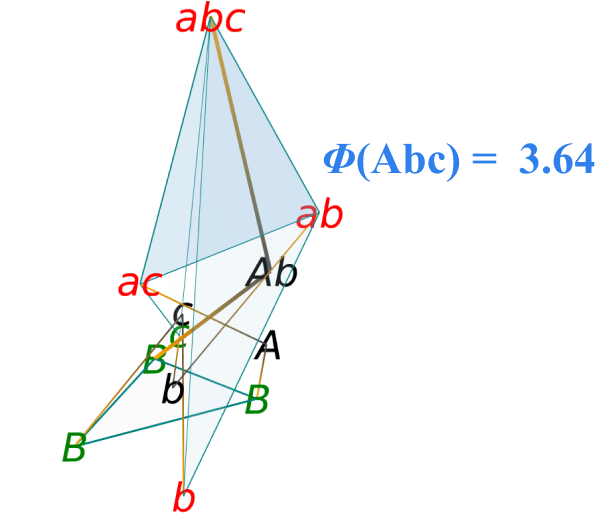

For convenience, PyPhi can be asked to automatically unfold the cause-effect
structure of a `candidate_system`, which internally follows the method calls
described above. If the `candidate_system` is in turn a maximal complex (as
found in the [System Irreducibility Analysis](#scrollTo=95b5fc3f)), then the cause-effect structure
is called a Φ-structure.

In [ ]:
phi_structure = pyphi.new_big_phi.phi_structure(candidate_system, parallel=False)
print(phi_structure)

┌──────────────────────────────────────┐
│             PhiStructure             │
│ ════════════════════════════════════ │
│               Φ:  5.410149997115375  │
│ #(distinctions):  4                  │
│           Σ φ_d:  1.792481250360578  │
│    #(relations): 14                  │
│           Σ φ_r:  3.6176687467547968 │
│ ┌──────────────────────────────────┐ │
│ │ SystemIrreducibilityAnalysis     │ │
│ │ ━━━━━━━━━━━━━━━━━━━━━━━━━━━      │ │
│ │      Subsystem:  A,B,C           │ │
│ │  Current state:  1,0,0           │ │
│ │            φ_s: 2.0              │ │
│ │ Normalized φ_s: 0.4              │ │
│ │          CAUSE:  (0, 0, 0)       │ │
│ │           II_c: 3.0              │ │
│ │         EFFECT:  (0, 1, 0)       │ │
│ │           II_e: 3.0              │ │
│ │   #(tied MIPs): 2                │ │
│ │      Partition:                  │ │
│ │                 3 parts: {A,B,C} │ │
│ │                 [[0 0 1]         │ │
│ │                  [1 0 1]         │ │
│ │             

Individual properties and components of the structure remain accessible. E.g:

In [ ]:
# φ_s
print(f"φ_s = {phi_structure.sia.phi}")
# Big Φ (sum of distincions and relations' small φ)
print(f"Big Φ = {phi_structure.big_phi}")

φ_s = 2.0
Big Φ = 5.410149997115375


So even though the `candidate_system` only has 3 units, an analysis of its
cause-effect structure reveals it is composed of 4 distinctions and 14 relations
among them.

In [ ]:
distinctions = phi_structure.distinctions
print(distinctions)

relations = phi_structure.relations
print(relations)

══════════════════════════════════════════════════════════════════════════════
                   Cause-effect structure (4 distinctions)                    
══════════════════════════════════════════════════════════════════════════════
  ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
                  Distinction: mechanism = [A], state = [1]                   
                             φ = 0.4387218755409                              
  ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
                   MIC                                  MIE                   
  ┌───────────────────────────────────┐┌───────────────────────────────────┐  
  │  φ = 1/2                          ││  φ = 0.4387218755409              │  
  │  Normalized φ = 1/4               ││  Normalized φ = 0.4387218755409   │  
  │  Purview: [A,C]                   ││  Purview: [B]                     │  
  │  Specified state:                 ││  Specified 

## Obtaining properties for all distinctions as generators or sequences:

Let's try to imitate the distinctions table in Figure 7-C by accessing the data in each of its "columns", all rows at once.

In [ ]:
import pandas as pd

# Mechanisms:
mechanism_indices = list(phi_structure.distinctions.mechanisms)
mechanism_labels = list(phi_structure.distinctions.labeled_mechanisms)

# Maximally irreducible causes.
causes = list(phi_structure.distinctions.purviews(pyphi.Direction.CAUSE))

# Maximally irreducible effects.
effects = list(phi_structure.distinctions.purviews(pyphi.Direction.EFFECT))

# Small φ values (distinction integrated information or irreducibility):
small_phis = list(phi_structure.distinctions.phis)

distinctions_table_figure_7C = {
    "mechanism": map(candidate_system.indices2nodes, mechanism_indices),
    "cause": map(candidate_system.indices2nodes, causes),
    "effect": map(candidate_system.indices2nodes, effects),
    "φ_d": small_phis
}

print(pd.DataFrame(distinctions_table_figure_7C))


  mechanism      cause effect       φ_d
0      (A,)     (A, C)   (B,)  0.438722
1      (B,)     (A, B)   (C,)  0.500000
2      (C,)       (B,)   (B,)  0.438722
3    (A, B)  (A, B, C)   (B,)  0.415037


# PyPhi documentation

Visit [pyphi.readthedocs.io](https://pyphi.readthedocs.io/en/latest/) for further information on PyPhi usage and its API.